In [ ]:
import numpy as np

def logistic_function(x):
    """
    Computes the logistic (sigmoid) function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    y = 1 / (1 + np.exp(-x))
    return y


def test_logistic_function():
    """
    Test cases for the logistic_function.
    """

    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, \
        "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, \
        "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, \
        "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])

    # Element-wise comparison after rounding
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), \
        "Test failed for numpy array input"

    print("All tests passed!")


# Run the test case
test_logistic_function()


All tests passed!


In [ ]:
import numpy as np
# Logistic (Sigmoid) Function
def logistic_function(x):
    """
    Computes the logistic (sigmoid) function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    y = 1 / (1 + np.exp(-x))
    return y
# Log-Loss Function
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target
    value y’ in between {0-1}.

    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value {0-1}.

    Returns:
    loss (float): loss/error value
    """

    # Raise error if y_pred is exactly 0 or 1
    if y_pred == 0 or y_pred == 1:
        raise ValueError("log(0) encountered. y_pred must be between 0 and 1.")

    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Log-loss formula
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss

def test_logistic_function():
    """
    Test cases for the logistic_function.
    """

    # Scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar

    # Positive scalar
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)
    assert round(logistic_function(x_pos), 3) == expected_output_pos

    # Negative scalar
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)
    assert round(logistic_function(x_neg), 3) == expected_output_neg

    # Numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array)

    print("Logistic function tests passed!")

def test_log_loss():
    """
    Test cases for the log_loss function.
    """

    # Perfect prediction cases (should raise ValueError)
    try:
        log_loss(1, 1)
    except ValueError:
        pass

    try:
        log_loss(0, 0)
    except ValueError:
        pass

    # Incorrect prediction cases (should raise ValueError)
    try:
        log_loss(1, 0)
    except ValueError:
        pass

    try:
        log_loss(0, 1)
    except ValueError:
        pass

    # Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6)

    y_true = 0
    y_pred = 0.2
    expected_loss = -(1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6)

    print("Log-loss function tests passed!")

print(f"log loss(0, 0.1) ==> {log_loss(0, 0.1)}")
print("+++++++++++++--------------------------++++++++++++++++++++++++")
print(f"log loss(1, 0.9) ==> {log_loss(1, 0.9)}")

test_logistic_function()
test_log_loss()


log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628
Logistic function tests passed!
Log-loss function tests passed!


In [ ]:
import numpy as np
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)

    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)

    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """

    # Ensure same length
    assert len(y_true) == len(y_pred), \
        "Length of true values and length of predicted values do not match"

    # Number of samples
    n = len(y_true)

    # Avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Vectorized log-loss for each sample
    loss_vec = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Average cost
    cost = np.sum(loss_vec) / n

    return cost

def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Expected cost (manual calculation)
    expected_cost = (
        -(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
        -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
        -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)
    ) / 3

    # Call the cost_function
    result = cost_function(y_true, y_pred)

    # Assertion
    assert np.isclose(result, expected_cost, atol=1e-6), \
        f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

test_cost_function()


Test passed for simple case!


In [4]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression (vectorized)
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function for logistic regression using vectorization.

    Args:
        X (ndarray, shape (m,n)): data matrix, m examples with n features
        y (ndarray, shape (m,)): true labels (0 or 1)
        w (ndarray, shape (n,)): weight parameters
        b (float): bias parameter

    Returns:
        cost (float): logistic regression cost
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Linear combination
    z = np.dot(X, w) + b   # shape: (m,)

    # Predictions using sigmoid
    y_pred = sigmoid(z)    # shape: (m,)

    # Compute cost (log loss)
    cost = -(1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
    return cost

# Testing the function
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print(f"Cost for logistic regression = {costfunction_logreg(X, y, w, b)}")


Cost for logistic regression = 5.500008350754968


In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

# Compute gradient for logistic regression
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.

    Args:
        X (ndarray, shape (n,d)): Input data, n observations with d features
        y (array_like, shape (n,)): True labels (0 or 1)
        w (array_like, shape (d,)): Weight parameters
        b (float): Bias parameter

    Returns:
        grad_w (ndarray, shape (d,)): Gradients w.r.t weights
        grad_b (float): Gradient w.r.t bias
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Linear combination
    z = np.dot(X, w) + b      # shape: (n,)

    # Predictions
    y_pred = sigmoid(z)       # shape: (n,)

    # Compute gradient w.r.t weights
    grad_w = (1/n) * np.dot(X.T, (y_pred - y))

    # Compute gradient w.r.t bias
    grad_b = (1/n) * np.sum(y_pred - y)

    return grad_w, grad_b
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

# Assertion test
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693
All tests passed!


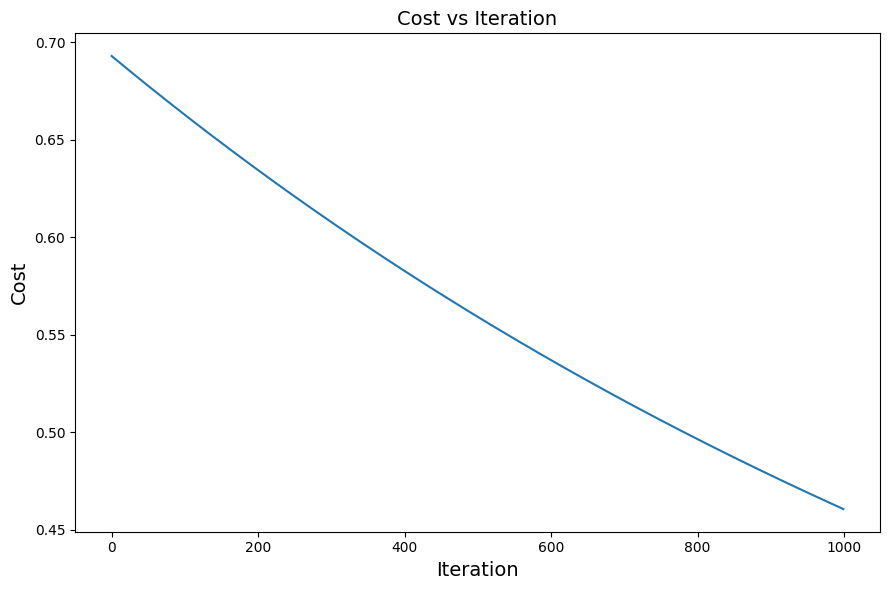

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def costfunction_logreg(X, y, w, b):
    m, n = X.shape
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    # Log loss cost
    cost = -(1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
    return cost

def compute_gradient(X, y, w, b):
    n, d = X.shape
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    grad_w = (1/n) * np.dot(X.T, (y_pred - y))
    grad_b = (1/n) * np.sum(y_pred - y)
    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

# Run gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

def test_gradient_descent():
    X_test = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y_test = np.array([1, 0])
    w_test = np.zeros(X_test.shape[1])
    b_test = 0.0
    alpha_test = 0.1
    n_iter_test = 100

    w_out, b_out, cost_history, _ = gradient_descent(X_test, y_test, w_test, b_test, alpha_test, n_iter_test, show_cost=False, show_params=False)

    assert len(cost_history) == n_iter_test, "Cost history length does not match the number of iterations"
    assert w_out.shape == w_test.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
    print("All tests passed!")

test_gradient_descent()
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

def cost_function(y_true, y_pred):
    """
    Computes binary cross-entropy (log loss).
    """
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = -(1 / len(y_true)) * np.sum(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )
    return cost

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    """
    Performs batch gradient descent for logistic regression.
    """
    n = X.shape[0]

    for i in range(n_iter):
        # Forward pass
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Gradients
        dw = (1 / n) * np.dot(X.T, (y_pred - y))
        db = (1 / n) * np.sum(y_pred - y)

        # Update parameters
        w = w - alpha * dw
        b = b - alpha * db

        # Optional cost display
        if show_cost and i % 100 == 0:
            cost = cost_function(y, y_pred)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary class labels.
    """
    z = np.dot(X, w) + b
    y_test_prob = sigmoid(z)
    y_pred = (y_test_prob >= threshold).astype(int)
    return y_pred
def test_prediction():
    X_test = np.array([[0.5, 1.0],
                       [1.5, -0.5],
                       [-0.5, -1.0]])

    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])

    y_pred = prediction(X_test, w_test, b_test, threshold)

    assert np.array_equal(y_pred, expected_output), \
        f"Expected {expected_output}, but got {y_pred}"

    print("✅ Prediction Test Passed!")

    test_prediction()


In [4]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = -(1 / len(y_true)) * np.sum(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )
    return cost
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    n = X.shape[0]

    for i in range(n_iter):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        dw = (1 / n) * np.dot(X.T, (y_pred - y))
        db = (1 / n) * np.sum(y_pred - y)

        w = w - alpha * dw
        b = b - alpha * db

        if show_cost and i % 100 == 0:
            cost = cost_function(y, y_pred)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_prob = sigmoid(z)
    y_pred = (y_prob >= threshold).astype(int)
    return y_pred

def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([
        [TN, FP],
        [FN, TP]
    ])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (
        2 * precision * recall / (precision + recall)
        if (precision + recall) > 0 else 0.0
    )

    return {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

def test_prediction():
    X_test = np.array([[0.5, 1.0],
                       [1.5, -0.5],
                       [-0.5, -1.0]])

    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])
    y_pred = prediction(X_test, w_test, b_test, threshold)

    assert np.array_equal(y_pred, expected_output), \
        f"Expected {expected_output}, but got {y_pred}"

    print("✅ Prediction Test Passed!")


def test_evaluation():
    y_true = np.array([1, 0, 1, 1, 0, 0])
    y_pred = np.array([1, 0, 0, 1, 1, 0])

    metrics = evaluate_classification(y_true, y_pred)

    print("\nConfusion Matrix:")
    print(metrics["confusion_matrix"])
    print("Precision:", metrics["precision"])
    print("Recall:", metrics["recall"])
    print("F1 Score:", metrics["f1_score"])

    print("✅ Evaluation Test Passed!")

if __name__ == "__main__":
    test_prediction()
    test_evaluation()


✅ Prediction Test Passed!

Confusion Matrix:
[[2 1]
 [1 2]]
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
✅ Evaluation Test Passed!
